<a href="https://colab.research.google.com/github/jford59/ML1/blob/main/ML1/HW3/ML3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy =  0.7402597402597403
Precision =  0.6511627906976745
Recall =  0.5283018867924528
F1 Score =  0.5833333333333333


Text(0.5, 427.9555555555555, 'Predicted Label')

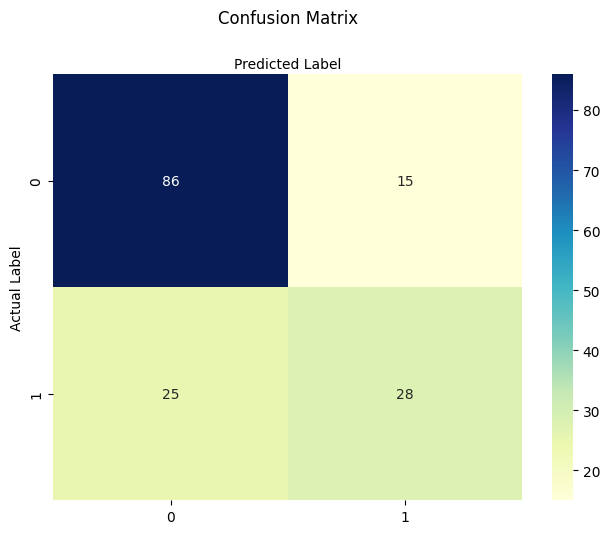

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head()

np.random.seed(0)
df_train, df_test = train_test_split(diabetes, train_size = 0.8, test_size = 0.2, random_state = 100)

Y_train = df_train.pop('Outcome').values
Y_test = df_test.pop('Outcome').values
X_train = df_train.values
X_test = df_test.values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
F1 = (2*precision*recall)/(precision+recall)
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 Score = ', F1)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')